In [130]:
import os, shutil

In [131]:
original_dataset_dir = '/Users/Davidaarhus/Documents/CPSC_393/original_data'

In [132]:
base_dir = '/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small'
os.mkdir(base_dir)

In [133]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)


In [134]:
train_dir

'/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small/train'

In [135]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [136]:
validation_dir

'/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small/validation'

In [137]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [138]:
test_dir

'/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small/test'

In [139]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [140]:
train_cats_dir

'/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small/train/cats'

In [141]:
train_dogs_dir

'/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small/train/dogs'

In [142]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [143]:
validation_cats_dir

'/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small/validation/cats'

In [144]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [145]:
test_cats_dir

'/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small/test/cats'

In [146]:
test_dogs_dir

'/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small/test/dogs'

In [147]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [148]:
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [149]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)


In [150]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [151]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [152]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [153]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [154]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [155]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [156]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [157]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [158]:
from keras import optimizers

In [159]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

In [160]:
from keras.preprocessing.image import ImageDataGenerator

In [161]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [164]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [165]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [166]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [167]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 103s 1s/step - loss: 0.6909 - acc: 0.5280 - val_loss: 0.7297 - val_acc: 0.5120
Epoch 2/30
100/100 [==============================] - 99s 995ms/step - loss: 0.6638 - acc: 0.6070 - val_loss: 0.6583 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 81s 814ms/step - loss: 0.6291 - acc: 0.6435 - val_loss: 0.6524 - val_acc: 0.6230
Epoch 4/30
100/100 [==============================] - 79s 789ms/step - loss: 0.5905 - acc: 0.6855 - val_loss: 0.6581 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 78s 784ms/step - loss: 0.5506 - acc: 0.7230 - val_loss: 0.5774 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 80s 801ms/step - loss: 0.5210 - acc: 0.7375 - val_loss: 0.6170 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 80s 795ms/step - loss: 0.4934 - acc: 0.7480 - val_loss: 0.4711 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 79s

In [168]:
model.save('cats_and_dogs_small_1.h5')

In [169]:
import matplotlib.pyplot as plt

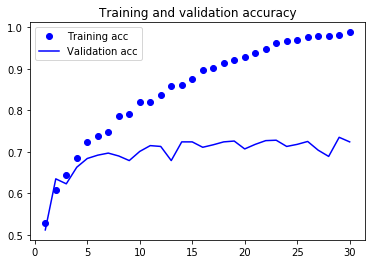

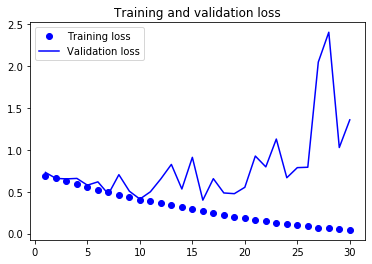

In [170]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [171]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [172]:
from keras.preprocessing import image

In [173]:
fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

In [174]:
img_path = fnames[3]

In [175]:
img = image.load_img(img_path, target_size=(150, 150))

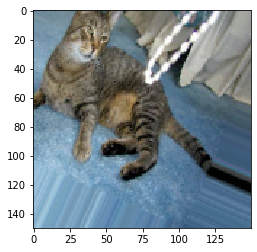

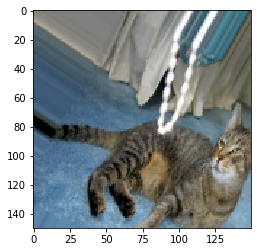

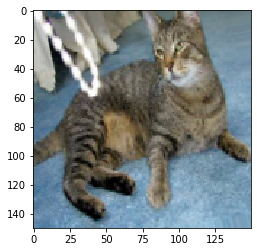

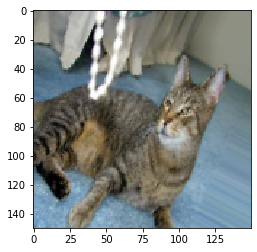

In [176]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [177]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [178]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [180]:
# this is the model for dropout and data augumentation, takes too long so I didn't run it

# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=100,
#     validation_data=validation_generator,
#     validation_steps=50)